# Universidade de Caxias do Sul

# Teste de classificação com kNN
Exemplo de uso de Python e SciKit Learn 

Última atualização em: 10-05-2022

In [1]:
# Importaçoes iniciais 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt
import pandas as pa
from sklearn import neighbors, datasets
import seaborn as sns


# Nomes das colunas dos dados
iris_cols = [ 'Comprimento das Sépalas', 'Largura das Sépalas', 'Comprimento das Pétalas', 'Largura das Pétalas' ]

iris_dataset = datasets.load_iris()
X = iris_dataset.data
y = iris_dataset.target
# df é o identificador para acesso e visualização o dataset
iris = pa.DataFrame(X, columns=iris_cols)
display(iris)

,Comprimento das Sépalas,Largura das Sépalas,Comprimento das Pétalas,Largura das Pétalas
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Primeira execução

## Validação com o mesmo conjunto de dados para treino e teste

In [2]:
n_neighbors = 10
weights='distance'
classificadorKnn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
classificadorKnn .fit(X, y)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [3]:
#Armazena as predicões
from sklearn.metrics import accuracy_score
predict = classificadorKnn.predict(X)
#Calcula acurácia do treino
accuracy_score(y,predict)*100

100.0

In [4]:
from sklearn.metrics import confusion_matrix
#Gera a matriz de confusão do treino
confusion_matrix(y,predict)

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

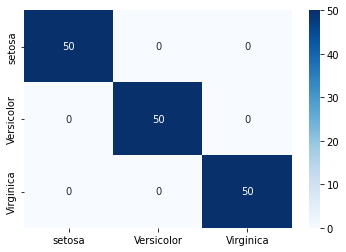

In [5]:
#Gera a matriz de confusão do treino na visualização de HeatMMap
cf = confusion_matrix(y,predict)
lbl1=['setosa', 'Versicolor', 'Virginica']
lbl2 = ['setosa', 'Versicolor', 'Virginica']
sns.heatmap(cf,annot=True,cmap="Blues", fmt="d",xticklabels=lbl1,yticklabels=lbl2)

# Segunda execução

##Criacao de conjuntos de treino e teste
## Método de amostragem HoldOut

In [6]:
#Criacao de conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(105, 4) (105,)
(45, 4) (45,)


In [7]:
ClassificadorNeigh = KNeighborsClassifier(n_neighbors=3,weights='distance')
ClassificadorNeigh.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [8]:
#Armazena as predicões
from sklearn.metrics import accuracy_score
predictions_train = ClassificadorNeigh.predict(X_test)
#Cálculo da acurácia
accuracy_score(y_test,predictions_train)*100

97.77777777777777

In [9]:
from sklearn.metrics import confusion_matrix
#Gera a matriz de confusão do treino
confusion_matrix(y_test,predictions_train)

array([[16,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 17]])

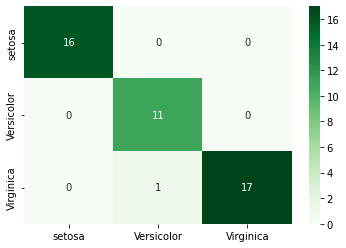

In [10]:
#Gera a matriz de confusão do treino na visualização de HeatMMap
cf = confusion_matrix(y_test,predictions_train)
lbl1=['setosa', 'Versicolor', 'Virginica']
lbl2 = ['setosa', 'Versicolor', 'Virginica']
sns.heatmap(cf,annot=True,cmap="Greens", fmt="d",xticklabels=lbl1,yticklabels=lbl2)

In [11]:
#Cálculo da acurácia com dados de teste
predictions = ClassificadorNeigh.predict(X_test)
accuracy_score(y_test,predictions)*100

97.77777777777777

# Terceira execução

##Criacao de conjuntos de treino e teste
## Método de amostragem Cross-Validation

In [12]:
#Cross Validation
ClassificadorCV = KNeighborsClassifier(n_neighbors=3,weights='distance')
predictions_train = cross_val_predict(ClassificadorCV,X,y,cv=10)

In [13]:
accuracy_score(y,predictions_train)*100

96.66666666666667

In [14]:
#Gera a matriz de confusão dos dados de treino
confusion_matrix(y,predictions_train)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]])

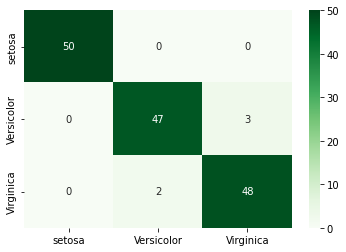

In [15]:
#Gera a matriz de confusão do treino na visualização de HeatMMap
import seaborn as sns
cf = confusion_matrix(y,predictions_train)
lbl1=['setosa', 'Versicolor', 'Virginica']
lbl2 = ['setosa', 'Versicolor', 'Virginica']
sns.heatmap(cf,annot=True,cmap="Greens", fmt="d",xticklabels=lbl1,yticklabels=lbl2)

# Sistema preditivo para Flores

## Encontre a melhor configuração do KNN e informe aqui

In [16]:
n_neighbors = 10
weights='distance'
MelhorclassificadorKnn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
MelhorclassificadorKnn.fit(X, y)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [17]:
print('----Simulação da Predição----')
lista=[]
tam_pet=float(input('Digite o tamanho da pétala:'))
lista.append(tam_pet)
tam_sep=float(input('Digite o tamanho da sépala:'))
lista.append(tam_sep)
lar_pet=float(input('Digite a largura da pétala:'))
lista.append(lar_pet)
lar_sep=float(input('Digite a largura da sépala:'))
lista.append(lar_sep)

----Simulação da Predição----
Digite o tamanho da pétala:10
Digite o tamanho da sépala:20
Digite a largura da pétala:10
Digite a largura da sépala:20


In [18]:
print('A classe desta flor é =>',MelhorclassificadorKnn.predict([lista]))
print(['0=Setosa', '1=Versicolor', '2=Virginica'])

A classe desta flor é => [2]
['0=Setosa', '1=Versicolor', '2=Virginica']


In [19]:
print('A classe desta flor é =>',MelhorclassificadorKnn.predict([X[135]]))
print('A classe real é =>',y[135])

A classe desta flor é => [2]
A classe real é => 2
